<a href="https://colab.research.google.com/github/Pugianf/Big_Data_and_Public_Sector_I/blob/main/Trabalho_Final_Big_Data_e_Setor_P%C3%BAblico_I_Popula%C3%A7%C3%A3o%2C_Demografia_e_Mercado_de_Trabalho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importando as bibliotecas necessárias

import pandas as pd
import numpy as np

In [4]:
# conectando ao google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# lendo o arquivo

suicidio_estados = pd.read_excel('/content/drive/MyDrive/IDP/Dataset/suicidios_estados.xlsx')

suicidio_estados.head(12)

,Código_UF,Nome_UF,Cód_Região,Ano,Num_Suicidios,Populacao,Taxa_Suicidios_100mil_habitantes,Indice_Infraestrutura_Urbana_IVS,Indice_Educacao_IDH,Taxa_Analfabetismo,Índ_Gini,Renda_Media,Num_Divorcios,Taxa_Divorcios_100mil_habitantes,Populacao_Maior18,Taxa_Desocupacao
0,11,Rondônia,2,2010,82,1562409,5.248306,0.231,0.577,0.0942,0.56,1203.77,3015,289.928657,1039911,0.407940
1,11,Rondônia,2,2011,78,1690710,4.613446,0.132,0.609,0.1066,0.50,1079.84,4199,371.155089,1131333,0.398602
2,11,Rondônia,2,2012,73,1712488,4.262804,0.090,0.632,0.0926,0.48,1069.65,3894,334.144812,1165363,0.355715
3,11,Rondônia,2,2013,86,1733265,4.961734,0.125,0.628,0.0924,0.47,1111.46,3369,280.484475,1201136,0.355271
4,11,Rondônia,2,2014,84,1753407,4.790673,0.042,0.667,0.0888,0.47,1136.90,3631,297.580753,1220173,0.336144
5,11,Rondônia,2,2015,109,1772941,6.147977,0.062,0.653,0.0865,0.47,1153.51,3265,263.219844,1240408,0.314526
6,12,Acre,2,2010,41,733559,5.589189,0.361,0.559,0.1779,0.63,1081.76,619,141.291620,438101,0.193043
7,12,Acre,2,2011,41,751766,5.453825,0.267,0.612,0.1594,0.55,937.11,1398,307.498746,454636,0.186769
8,12,Acre,2,2012,43,765873,5.614508,0.280,0.621,0.1462,0.55,949.61,1360,288.406280,471557,0.160102
9,12,Acre,2,2013,44,779572,5.644123,0.141,0.624,0.1606,0.52,970.83,1054,219.848526,479421,0.171439


In [6]:
# vendo  o tamanho da base

print(f"Linhas: {suicidio_estados.shape[0]}; Colunas: {suicidio_estados.shape[1]}")

Linhas: 162; Colunas: 16


In [7]:
# verificando os anos que constam no DataFrame

suicidio_estados.Ano.unique()

array([2010, 2011, 2012, 2013, 2014, 2015])

In [8]:
# verificando a presença de valores nulos no DataFrame

suicidio_estados.isnull().values.any()

False

In [9]:
# analisando a base

suicidio_estados.describe()

,Código_UF,Cód_Região,Ano,Num_Suicidios,Populacao,Taxa_Suicidios_100mil_habitantes,Indice_Infraestrutura_Urbana_IVS,Indice_Educacao_IDH,Taxa_Analfabetismo,Índ_Gini,Renda_Media,Num_Divorcios,Taxa_Divorcios_100mil_habitantes,Populacao_Maior18,Taxa_Desocupacao
count,162.000000,162.000000,162.000000,162.000000,1.620000e+02,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,1.620000e+02,162.000000
mean,29.111111,2.814815,2012.500000,382.623457,7.393753e+06,5.421299,0.237488,0.660302,0.115632,0.520309,1134.130741,9190.950617,175.503406,5.336551e+06,0.319348
std,12.820791,1.252189,1.713121,456.184119,8.669442e+06,1.847509,0.100142,0.063854,0.063521,0.047174,374.453248,14400.120203,67.513965,6.521910e+06,0.146167
min,11.000000,1.000000,2010.000000,15.000000,4.504790e+05,2.479867,0.042000,0.520000,0.028900,0.420000,582.450000,299.000000,63.835011,2.714160e+05,0.121674
25%,17.000000,2.000000,2011.000000,125.000000,2.603364e+06,4.202466,0.160750,0.613000,0.066950,0.490000,846.725000,3038.750000,125.629462,1.882850e+06,0.194308
50%,27.000000,3.000000,2012.500000,209.000000,3.853334e+06,5.242112,0.217000,0.655500,0.090800,0.520000,1114.140000,5301.000000,163.062239,2.734735e+06,0.248511
75%,41.000000,4.000000,2014.000000,485.250000,9.039064e+06,6.382582,0.307500,0.697750,0.172150,0.540000,1319.177500,9755.500000,203.486164,6.391153e+06,0.447707
max,53.000000,5.000000,2015.000000,2300.000000,4.449976e+07,10.596579,0.526000,0.810000,0.260900,0.650000,2581.690000,86058.000000,371.155089,3.406099e+07,0.677868


In [10]:
# ao se agrupar o df pelos nomes das UFs e pelos anos, é possível verificar que as variáveis Código_UF e Cód_Região são constantes no tempo

suicidio_estados.groupby(['Nome_UF', 'Ano']).first()

Código_UF  Cód_Região  ...  Populacao_Maior18  Taxa_Desocupacao
Nome_UF   Ano                          ...                                     
Acre      2010         12           2  ...             438101          0.193043
          2011         12           2  ...             454636          0.186769
          2012         12           2  ...             471557          0.160102
          2013         12           2  ...             479421          0.171439
          2014         12           2  ...             486495          0.163026
...                   ...         ...  ...                ...               ...
Tocantins 2011         17           2  ...             959507          0.198621
          2012         17           2  ...             975355          0.189121
          2013         17           2  ...             988292          0.190130
          2014         17           2  ...            1030906          0.217784
          2015         17           2  ...            1065513          0.215817

[162 rows x 14 columns]

In [11]:
# verificando a maior e menor renda média por UF, considerando todos os anos

# Maior renda media: Distrito Federal
# Menor renda media: Maranhão

suicidio_estados.groupby(by='Nome_UF').mean()['Renda_Media'].sort_values(ascending=False).reset_index()

,Nome_UF,Renda_Media
0,Distrito Federal,2466.741667
1,São Paulo,1571.781667
2,Rio de Janeiro,1482.140000
3,Santa Catarina,1435.761667
4,Mato Grosso do Sul,1399.443333
5,Paraná,1391.240000
6,Mato Grosso,1359.230000
7,Rio Grande do Sul,1285.716667
8,Goiás,1267.768333
9,Espírito Santo,1224.313333


In [12]:
# substituindo os valores em Cod_Região pelos nomes da Regiões usando replace()

dicionario_regiões = {1: 'Centro-Oeste', 2: 'Norte', 3: 'Nordeste', 4: 'Sul', 5: 'Sudeste'}

suicidio_estados['Cód_Região'].replace(dicionario_regiões, inplace=True)

In [13]:
# número de estados em cada região

for região in dicionario_regiões.values():
  
  numero_estados = len(suicidio_estados[suicidio_estados['Cód_Região'] == região]['Nome_UF'].unique())
  print(f'{região} = {numero_estados} estados')

Centro-Oeste = 4 estados
Norte = 8 estados
Nordeste = 8 estados
Sul = 3 estados
Sudeste = 4 estados


In [28]:
# Criando DataFrame com média de Taxas de Suicídio por 100 mil habitantes, por região

media_suicidios_regiao = suicidio_estados[suicidio_estados['Ano'] == 2015].groupby('Cód_Região').sum()['Taxa_Suicidios_100mil_habitantes'].sort_values(ascending=False).reset_index()

media_suicidios_regiao['num_estados'] = media_suicidios_regiao['Cód_Região'].apply(lambda x: len(suicidio_estados[suicidio_estados['Cód_Região'] == x]['Nome_UF'].unique()))

media_suicidios_regiao['Taxa_Suicidios_100mil_habitantes_media'] = media_suicidios_regiao['Taxa_Suicidios_100mil_habitantes'] / media_suicidios_regiao['num_estados']

media_suicidios_regiao.sort_values('Taxa_Suicidios_100mil_habitantes_media', ascending=False)

# a região com maior taxa média de suicídios por 100 mil habitantes no ano de 2015 foi a região Sul

,Cód_Região,Taxa_Suicidios_100mil_habitantes,num_estados,Taxa_Suicidios_100mil_habitantes_media
2,Sul,25.843913,3,8.614638
0,Norte,48.549307,8,6.068663
3,Centro-Oeste,24.082543,4,6.020636
1,Nordeste,40.261822,8,5.032728
4,Sudeste,19.404599,4,4.851150


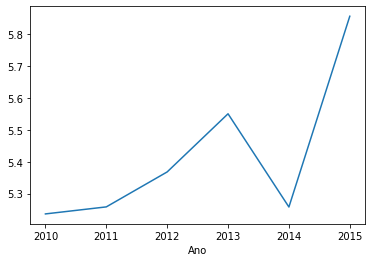

In [46]:
suicidio_estados.groupby('Ano').sum()['Taxa_Suicidios_100mil_habitantes'].div(27).plot()